### 1. Convolutions

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Conv1D, Flatten, Conv3D

Explanation of the workings and how to calculate the number of parameters created by each operation of a Convolution Neural Network(CNN)

i) Keras model for 2D input image with a 1D conv operation

In [37]:
# Initialize the model
model = Sequential()

# Add a convolutional  and other layers
model.add(Conv1D(32, 3, activation='relu', input_shape=(100, 10)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 98, 32)            992       
                                                                 
 flatten_11 (Flatten)        (None, 3136)              0         
                                                                 
 dense_27 (Dense)            (None, 1)                 3137      
                                                                 
Total params: 4,129
Trainable params: 4,129
Non-trainable params: 0
_________________________________________________________________


In [3]:
# The total number of parameters 4129

ii) A 3D input with a 2D conv,

In [33]:
# Initialize the model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='valid', activation='relu', input_shape=(64,64,3)))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


iii) a 2D input with a 3D conv

In [44]:
from keras.models import Sequential
from keras.layers import Conv3D, Flatten, Dense

model = Sequential()

model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(64, 64, 3, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Print the model summary
model.summary()

#https://keras.io/api/layers/convolution_layers/convolution3d/

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_2 (Conv3D)           (None, 62, 62, 1, 32)     896       
                                                                 
 flatten_18 (Flatten)        (None, 123008)            0         
                                                                 
 dense_34 (Dense)            (None, 10)                1230090   
                                                                 
Total params: 1,230,986
Trainable params: 1,230,986
Non-trainable params: 0
_________________________________________________________________


### 2. Image Classification Using Convolution Neural Networks

##### 2 a)Split the dataset random into train/valid/test 70:15:15 using set seed 283. 

In [ ]:
# importing and splitting the data

In [2]:
import os
import numpy as np
import glob
import shutil
import random

import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
base_dir = "kvasir-dataset-v2"

In [4]:
classes = ['dyed-lifted-polyps',
           'dyed-resection-margins',
           'esophagitis','normal-cecum',
           'normal-pylorus','normal-z-line',
           'polyps',
           'ulcerative-colitis']



In [5]:
random.seed(283)

for cl in classes:
    
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    
    random.shuffle(images)
    
    train_size = int(0.7 * len(images))
    val_size = int(0.15 * len(images))
    
    train_list = images[:train_size]
    valid_list = images[train_size:train_size+val_size]
    test_list = images[train_size+val_size:]
    
    for image in train_list:
        if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        shutil.move(image, os.path.join(base_dir, 'train', cl))

    for image in valid_list:
        if not os.path.exists(os.path.join(base_dir, 'valid', cl)):
            os.makedirs(os.path.join(base_dir, 'valid', cl))
        shutil.move(image, os.path.join(base_dir, 'valid', cl))

    for image in test_list:
        if not os.path.exists(os.path.join(base_dir, 'test', cl)):
            os.makedirs(os.path.join(base_dir, 'test', cl))
        shutil.move(image, os.path.join(base_dir, 'test', cl))
        
        
#Source: https://github.com/AfraHussaindeen/Kvasir-Dataset


dyed-lifted-polyps: 0 Images
dyed-resection-margins: 0 Images
esophagitis: 0 Images
normal-cecum: 0 Images
normal-pylorus: 0 Images
normal-z-line: 0 Images
polyps: 0 Images
ulcerative-colitis: 0 Images


##### Setting up the model

In [3]:
# import key libraries

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt

In [4]:

# Data Augmentation
train_dataAugmentation = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5, 0.9),
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    fill_mode='nearest'
)

test_dataAugmentation = ImageDataGenerator(rescale=1./255)

valid_dataAugmentation = ImageDataGenerator(rescale=1./255)

# Data Generators
train_data_generator = train_dataAugmentation.flow_from_directory(
    'kvasir-dataset-v2/train',
    target_size=(200, 200),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_data_generator = test_dataAugmentation.flow_from_directory(
    'kvasir-dataset-v2/test',
    target_size=(200, 200),
    batch_size=50,
    class_mode='categorical'
)

valid_data_generator = valid_dataAugmentation.flow_from_directory(
    'kvasir-dataset-v2/valid',
    target_size=(200, 200),
    batch_size=50,
    class_mode='categorical'
)

# #Source: https://github.com/AfraHussaindeen/Kvasir-Dataset

Found 5600 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.


In [5]:
# get the train data class indices
train_data_generator.class_indices
     

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

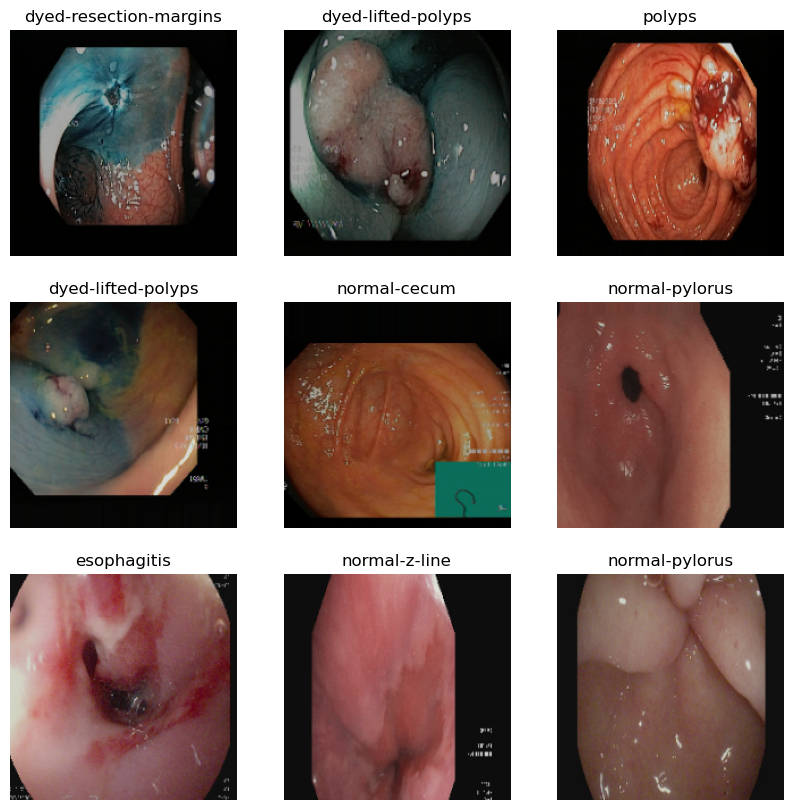

In [6]:
# visualize a batch of images from the training data generator with their corresponding class labels


class_indices ={0:"dyed-lifted-polyps",1:"dyed-resection-margins",2:"esophagitis",3:"normal-cecum",4:"normal-pylorus",5:"normal-z-line",6:"polyps",7:"ulcerative-colitis"}

plt.figure(figsize=(10, 10))
for X_batch, y_batch in train_data_generator:
  for i in range(9):
    image=X_batch[i]
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(image)
    plt.title(class_indices[list(y_batch[i]).index(1.0)])
    plt.axis("off")
  break




In [13]:
#Base Model
#The model has 2 layers  with 16 and 32 filters respectively.
#The number of nodes in the dense layer has been reduced from 1024 and 512 to 256 and 128 respectively

model1 = Sequential()

model1.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(8, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [14]:
history = model1.fit(
    train_data_generator,
    steps_per_epoch=train_data_generator.n // train_data_generator.batch_size,
    validation_data=valid_data_generator,
    validation_steps=valid_data_generator.n // valid_data_generator.batch_size,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5),# patience chanaged to 5
               ModelCheckpoint(filepath='best_model1.h5', monitor='val_loss', save_best_only=True)]
)

Epoch 1/10
175/175 [==============================] - 156s 887ms/step - loss: 3.6282 - accuracy: 0.4446 - val_loss: 8.2048 - val_accuracy: 0.1325
Epoch 2/10
175/175 [==============================] - 156s 892ms/step - loss: 1.3048 - accuracy: 0.4977 - val_loss: 5.5821 - val_accuracy: 0.2667
Epoch 3/10
175/175 [==============================] - 155s 888ms/step - loss: 1.0735 - accuracy: 0.5434 - val_loss: 1.2173 - val_accuracy: 0.5325
Epoch 4/10
175/175 [==============================] - 156s 890ms/step - loss: 1.0417 - accuracy: 0.5509 - val_loss: 0.9276 - val_accuracy: 0.6167
Epoch 5/10
175/175 [==============================] - 154s 884ms/step - loss: 1.0022 - accuracy: 0.5495 - val_loss: 0.9739 - val_accuracy: 0.5483
Epoch 6/10
175/175 [==============================] - 155s 887ms/step - loss: 0.9819 - accuracy: 0.5718 - val_loss: 0.9189 - val_accuracy: 0.6183
Epoch 7/10
175/175 [==============================] - 156s 892ms/step - loss: 0.9897 - accuracy: 0.5586 - val_loss: 0.9132 -

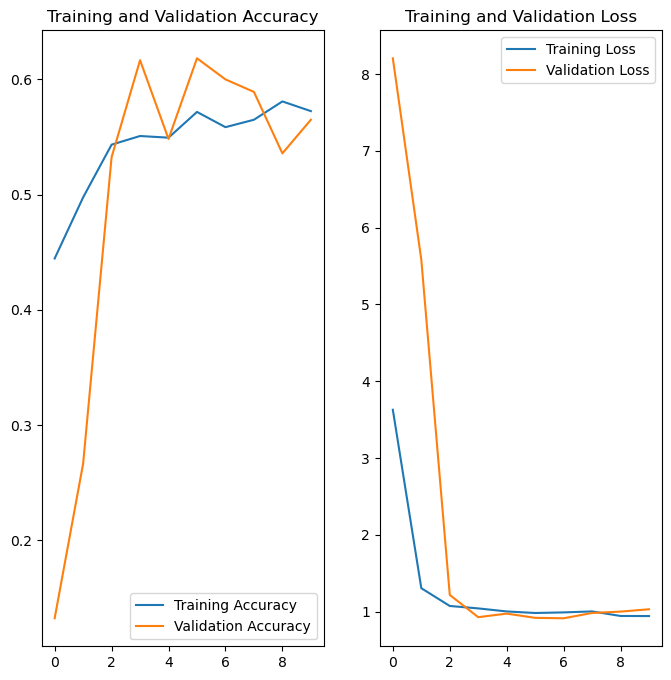

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Improved Model 2


Increased the convolution layers in the model from 2 to 4 and increased the dense layer nodes

In [7]:

model2 = Sequential()

model2.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(8, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
history2 = model2.fit(
    train_data_generator,
    steps_per_epoch=train_data_generator.n // train_data_generator.batch_size,
    validation_data=valid_data_generator,
    validation_steps=valid_data_generator.n // valid_data_generator.batch_size,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5),
               ModelCheckpoint(filepath='best_model2.h5', monitor='val_loss', save_best_only=True)]
)

Epoch 1/10
175/175 [==============================] - 297s 2s/step - loss: 1.7704 - accuracy: 0.4871 - val_loss: 8.0479 - val_accuracy: 0.1517
Epoch 2/10
175/175 [==============================] - 231s 1s/step - loss: 1.0372 - accuracy: 0.5721 - val_loss: 2.8521 - val_accuracy: 0.3483
Epoch 3/10
175/175 [==============================] - 217s 1s/step - loss: 0.8825 - accuracy: 0.6148 - val_loss: 1.2955 - val_accuracy: 0.4900
Epoch 4/10
175/175 [==============================] - 219s 1s/step - loss: 0.7779 - accuracy: 0.6489 - val_loss: 0.7772 - val_accuracy: 0.6467
Epoch 5/10
175/175 [==============================] - 226s 1s/step - loss: 0.7568 - accuracy: 0.6559 - val_loss: 0.9121 - val_accuracy: 0.5892
Epoch 6/10
175/175 [==============================] - 226s 1s/step - loss: 0.7269 - accuracy: 0.6693 - val_loss: 0.6974 - val_accuracy: 0.6858
Epoch 7/10
175/175 [==============================] - 229s 1s/step - loss: 0.7180 - accuracy: 0.6668 - val_loss: 0.8833 - val_accuracy: 0.5825

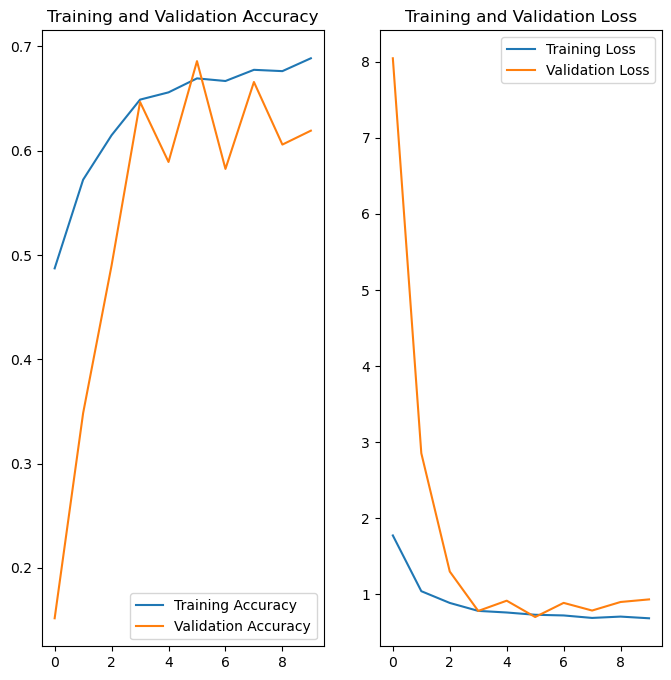

In [9]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



##### Evaluate the model performance 


In [10]:
best_model = load_model(filepath='best_model2.h5')
loss,acc=best_model.evaluate_generator(generator=test_data_generator,
steps=test_data_generator.n//test_data_generator.batch_size)

C:\Users\babir\AppData\Local\Temp\ipykernel_15848\304978190.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,acc=best_model.evaluate_generator(generator=test_data_generator,


In [11]:
print ('The best model Loss : ',loss)
print ('The best model Accuracy : ',acc)
     

The best model Loss :  0.7206949591636658
The best model Accuracy :  0.6608333587646484


##### Improved Model 3

In [21]:
#Improved Model 3
## increased the dropout rate to 0.3 from 0.2
# increase the number of epochs from 10 to 20
# increased patience to 10 from 5

model3 = Sequential()

model3.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dropout(0.3))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(8, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [22]:
history3 = model3.fit(
    train_data_generator,
    steps_per_epoch=train_data_generator.n // train_data_generator.batch_size,
    validation_data=valid_data_generator,
    validation_steps=valid_data_generator.n // valid_data_generator.batch_size,
    epochs=20,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10),
               ModelCheckpoint(filepath='best_model2.h5', monitor='val_loss', save_best_only=True)]
)

Epoch 1/20
175/175 [==============================] - 336s 2s/step - loss: 4.6644 - accuracy: 0.4187 - val_loss: 9.8118 - val_accuracy: 0.1425
Epoch 2/20
175/175 [==============================] - 236s 1s/step - loss: 1.5787 - accuracy: 0.4343 - val_loss: 3.1471 - val_accuracy: 0.2983
Epoch 3/20
175/175 [==============================] - 234s 1s/step - loss: 1.2737 - accuracy: 0.4839 - val_loss: 1.1593 - val_accuracy: 0.5367
Epoch 4/20
175/175 [==============================] - 258s 1s/step - loss: 1.1755 - accuracy: 0.4970 - val_loss: 0.9236 - val_accuracy: 0.5858
Epoch 5/20
175/175 [==============================] - 256s 1s/step - loss: 1.1654 - accuracy: 0.5114 - val_loss: 1.1115 - val_accuracy: 0.5033
Epoch 6/20
175/175 [==============================] - 281s 2s/step - loss: 1.1584 - accuracy: 0.5100 - val_loss: 1.0821 - val_accuracy: 0.5500
Epoch 7/20
175/175 [==============================] - 224s 1s/step - loss: 1.0804 - accuracy: 0.5177 - val_loss: 1.1624 - val_accuracy: 0.4392

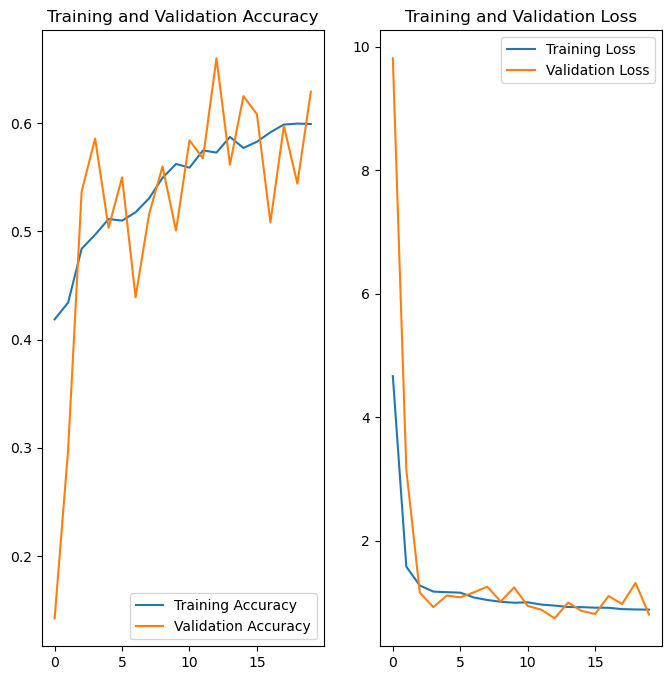

In [23]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###### Model Evaluation

In [24]:
best_model = load_model(filepath='best_model2.h5')
loss,acc=best_model.evaluate_generator(generator=test_data_generator,
steps=test_data_generator.n//test_data_generator.batch_size)

C:\Users\babir\AppData\Local\Temp\ipykernel_15848\304978190.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,acc=best_model.evaluate_generator(generator=test_data_generator,


In [25]:
print ('The best model Loss : ',loss)
print ('The best model Accuracy : ',acc)

The best model Loss :  0.7683762907981873
The best model Accuracy :  0.6366666555404663


##### Transfer Learning

##### Transfer learning using the VGG16 Model

In [27]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dropout, Dense

# Load pre-trained VGG16, without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top for our task
x = base_model.output
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

# Create the new model
model4 = Model(inputs=base_model.input, outputs=predictions)

model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Source: https://keras.io/api/applications/vgg/
        

In [28]:
history4 = model4.fit(
    train_data_generator,
    steps_per_epoch=train_data_generator.n // train_data_generator.batch_size,
    validation_data=valid_data_generator,
    validation_steps=valid_data_generator.n // valid_data_generator.batch_size,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5),
               ModelCheckpoint(filepath='best_model4.h5', monitor='val_loss', save_best_only=True)]
) 




Epoch 1/10
175/175 [==============================] - 470s 3s/step - loss: 1.3450 - accuracy: 0.4534 - val_loss: 0.8822 - val_accuracy: 0.6200
Epoch 2/10
175/175 [==============================] - 469s 3s/step - loss: 0.9503 - accuracy: 0.6000 - val_loss: 0.7407 - val_accuracy: 0.6792
Epoch 3/10
175/175 [==============================] - 449s 3s/step - loss: 0.8462 - accuracy: 0.6304 - val_loss: 0.7799 - val_accuracy: 0.6658
Epoch 4/10
175/175 [==============================] - 472s 3s/step - loss: 0.7814 - accuracy: 0.6705 - val_loss: 0.6033 - val_accuracy: 0.7542
Epoch 5/10
175/175 [==============================] - 459s 3s/step - loss: 0.7951 - accuracy: 0.6711 - val_loss: 0.6434 - val_accuracy: 0.7283
Epoch 6/10
175/175 [==============================] - 452s 3s/step - loss: 0.7662 - accuracy: 0.6780 - val_loss: 0.6558 - val_accuracy: 0.7225
Epoch 7/10
175/175 [==============================] - 462s 3s/step - loss: 0.7407 - accuracy: 0.6882 - val_loss: 0.5994 - val_accuracy: 0.7525

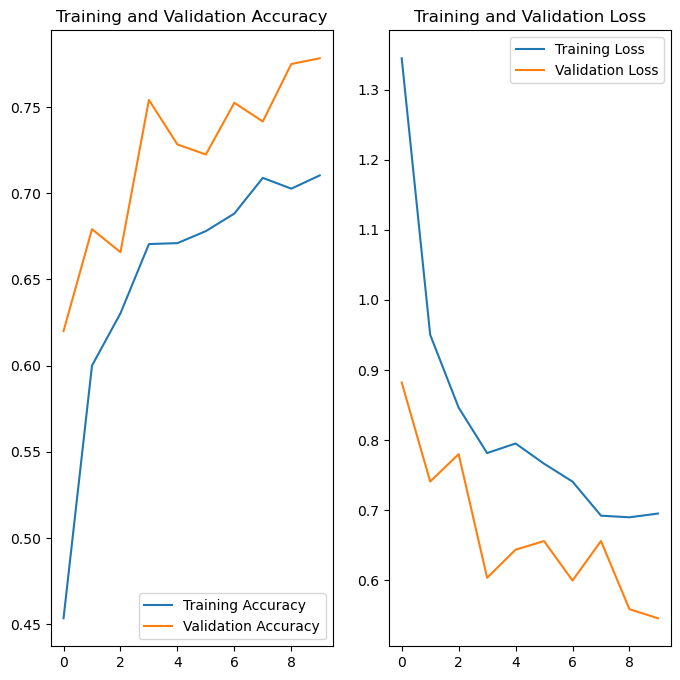

In [29]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Model Evaluation

In [30]:
best_model = load_model(filepath='best_model4.h5')
loss,acc=best_model.evaluate_generator(generator=test_data_generator,
steps=test_data_generator.n//test_data_generator.batch_size)

C:\Users\babir\AppData\Local\Temp\ipykernel_15848\3604709046.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,acc=best_model.evaluate_generator(generator=test_data_generator,


In [31]:
print ('The best model Loss : ',loss)
print ('The best model Accuracy : ',acc)

The best model Loss :  0.5329639911651611
The best model Accuracy :  0.7749999761581421
